In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\rprioleau\OneDrive - Healthfirst\Desktop\NYPD_Arrest_Data__Year_to_Date__20240506.csv")

In [3]:
#The goal of this analysis is to identify the race that had the highest proportion of arrests in Bronx and compare it against Brooklyn. The focus will be on the male population between the ages of 25 - 44.

In [6]:
df.head(20)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,1/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,1/2/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,1/3/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,1/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,1/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
5,281488967,2/1/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,113,0,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
6,280769124,1/19/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,6,0,25-44,M,BLACK,984134,207984,40.737547,-74.000415,POINT (-74.000415 40.737547)
7,281338081,1/30/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,26,0,25-44,M,BLACK,996014,236126,40.814780,-73.957499,POINT (-73.957499 40.81478)
8,280961365,1/23/2024,NaN,(null),NaN,(null),(null),(null),M,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
9,281426006,1/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [5]:
#Before the analysis can begin, I will need to do some data cleaning to remove missing values. In reviewing the data set, I can see that there are null values across a few different columns.

In [7]:
missing_values=["(null)", "n/a", "_", "s"]
df = pd.read_csv(r"C:\Users\rprioleau\OneDrive - Healthfirst\Desktop\NYPD_Arrest_Data__Year_to_Date__20240506.csv",
na_values = missing_values)

In [8]:
df.head(20)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,1/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,1/2/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,1/3/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,1/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,1/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
5,281488967,2/1/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,113,0,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
6,280769124,1/19/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,6,0,25-44,M,BLACK,984134,207984,40.737547,-74.000415,POINT (-74.000415 40.737547)
7,281338081,1/30/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,26,0,25-44,M,BLACK,996014,236126,40.814780,-73.957499,POINT (-73.957499 40.81478)
8,280961365,1/23/2024,NaN,NaN,NaN,NaN,NaN,NaN,M,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
9,281426006,1/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [13]:
#I want to know which race has the highest number of arrests overall and can see that blacks make up the highest number arrests across all boroughs.
df.groupby(['PERP_RACE'])['ARREST_KEY'].count()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      185
ASIAN / PACIFIC ISLANDER           3543
BLACK                             29466
BLACK HISPANIC                     6336
UNKNOWN                             293
WHITE                              6607
WHITE HISPANIC                    17191
Name: ARREST_KEY, dtype: int64

In [14]:
#Next, I would like to see the breakdown of arrests by borough.  Bronx has the highest number of arrests followed by Brooklyn.
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count()

ARREST_BORO
B    14221
K    17402
M    15324
Q    13782
S     2892
Name: ARREST_KEY, dtype: int64

In [16]:
#I would also like to see the breakdown of arrests by age group and the group that has the highest amount is the 25 - 44 year olds.
df.groupby(['AGE_GROUP'])['ARREST_KEY'].count()

AGE_GROUP
18-24    10684
25-44    37254
45-64    12315
65+       1041
<18       2327
Name: ARREST_KEY, dtype: int64

In [5]:
#I would like to see the breakdown of arrests between males and femalels and males have the highest number of arrests across all boroughs and age groups.
df.groupby(['PERP_SEX'])['ARREST_KEY'].count()

PERP_SEX
F    11189
M    52432
Name: ARREST_KEY, dtype: int64

In [9]:
#Now that I have cleaned up my data and have identified some information regarding the overall population, I will need to create the two cohorts that I want to compare.   One cohort will include arrests in the Bronx and the other cohort will include arrests in Brooklyn. Both cohorts will focus on males between the ages of 25 - 44. 

In [21]:
#This cohort includes males between the age of 25 - 44 in Brooklyn that was arrested.
df1 = df[(df['ARREST_BORO'] == 'K') & (df['AGE_GROUP'] == '25-44')]

In [29]:
#This cohort icludes males between the age of 25 - 44 in Queens that was arrested.
df2 = df[(df['ARREST_BORO'] == 'B') & (df['AGE_GROUP'] == '25-44')]

In [24]:
#Of the total arrests that took place the Bronx, black males between 25 - 44, made up the highest number and proportion of arrest by 40%, followed by White Hispanic males at 21% and White males at 12%.
df1.groupby(['PERP_RACE'])['ARREST_KEY'].count()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      27
ASIAN / PACIFIC ISLANDER           475
BLACK                             5546
BLACK HISPANIC                     584
UNKNOWN                             39
WHITE                             1254
WHITE HISPANIC                    2146
Name: ARREST_KEY, dtype: int64

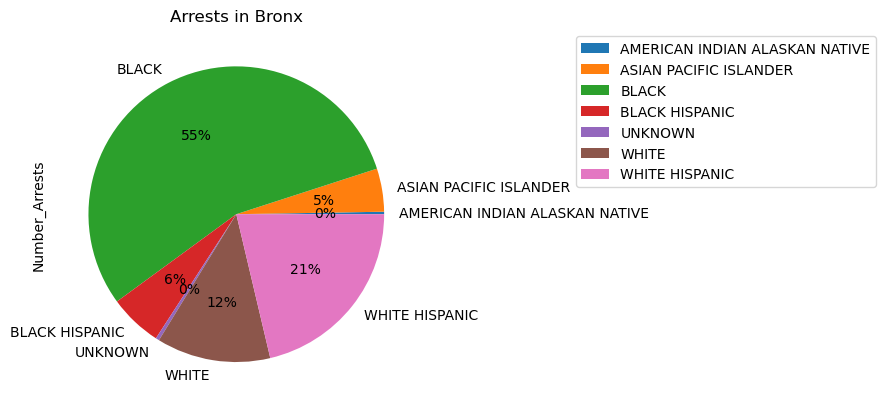

In [32]:
df1 = pd.DataFrame({ 'Race': ['AMERICAN INDIAN ALASKAN NATIVE', 'ASIAN PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC'], 'Number_Arrests': [27, 475, 5546, 584, 39, 1254, 2146]})
df1.groupby(['Race']).sum().plot(kind='pie', y='Number_Arrests', autopct='%1.0f%%', title='Arrests in Bronx')
plt.legend(bbox_to_anchor=(1.40, 1), loc='upper left')

In [30]:
#Of the total arrests that took place the Brooklyn, black males between 25 - 44, made up the highest number and proportion of arrest with 45%, followed by White Hispanic males at 30% and Black Hispanic males at 19%.
df2.groupby(['PERP_RACE'])['ARREST_KEY'].count()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      14
ASIAN / PACIFIC ISLANDER           117
BLACK                             3828
BLACK HISPANIC                    1610
UNKNOWN                             56
WHITE                              258
WHITE HISPANIC                    2533
Name: ARREST_KEY, dtype: int64

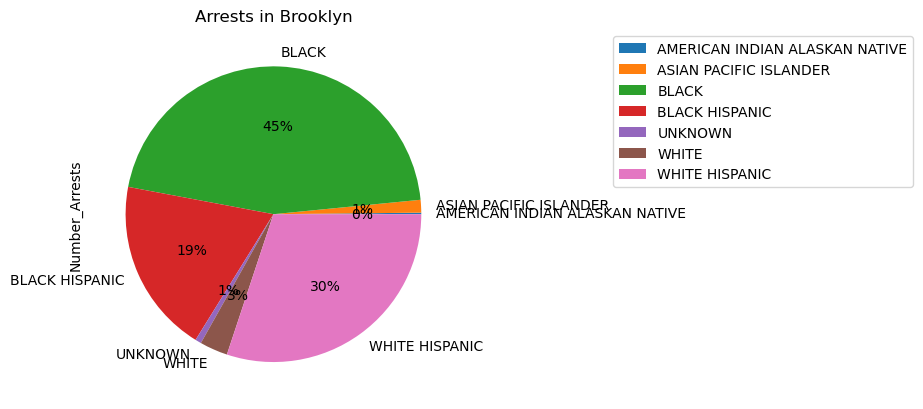

In [34]:
df2 = pd.DataFrame({ 'Race': ['AMERICAN INDIAN ALASKAN NATIVE', 'ASIAN PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC'], 'Number_Arrests': [14, 117, 3828, 1610, 56, 258, 2533]})
df2.groupby(['Race']).sum().plot(kind='pie', y='Number_Arrests', autopct='%1.0f%%', title='Arrests in Brooklyn')
plt.legend(bbox_to_anchor=(1.40, 1), loc='upper left')

In [ ]:
#In conclusion, in both Brooklyn and Bronx, black males in the age category of 25 - 44 made up the highest proportion of arrests.  In both boroughs, White Hispanic males made up the second largest group.  However, the third racial group for Brooklyn and Bronx differs. In Brooklyn, Black Hispanics make up the third largest group to be arrested and in Bronx, White males made up the third largest group.  

In [ ]:
#There is a significant risk of bias associated with this data set.  In reading the results of this analysis that identified black males between 25 - 44 as making up the largest amount of arrests in comparison to other 25 - 44 males in other racial categories in both Brooklyn and Bronx, one could assume that a race (black males) is more likely to commit crimes. However, it is important to understand the racial make-up of the borough being reviewed. If a specific racial group make up the largest proportion of the borough, then it more likely that racial group would make up most of the arrests. Furthermore, we have to keep in mind any racial bias that a police officer may have in making those arrests.  